In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
marketing = pd.read_csv("/content/drive/MyDrive/INSY336 Project/marketing_campaign.csv",sep = '\t')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
marketing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Data Preprocessing

In [3]:
# Replacing YOLO and Absurd by ‘None’
marketing = marketing.replace('YOLO', None)
marketing = marketing.replace('Absurd', None)

In [4]:
# Combining relationship status
marketing = marketing.replace(('Alone', 'Divorced', 'Widow'), 'Single')
marketing = marketing.replace('Married', 'Together')

In [5]:
# Combining 2n cycle
marketing = marketing.replace('2n Cycle', 'Master')

In [6]:
# Drop the null values
marketing = marketing.dropna()

In [7]:
# Dummify Education and Marital Status
marketing = pd.get_dummies(marketing, columns = ['Education', 'Marital_Status'])

In [8]:
# Calculating customer age
marketing['Age'] = 2022 - marketing['Year_Birth']

In [9]:
# Amount spent on products for 1 year

# Wines
marketing['MntWines'] = marketing['MntWines']/2

# Fruits
marketing['MntFruits'] = marketing['MntFruits']/2

# Meats
marketing['MntMeatProducts'] = marketing['MntMeatProducts']/2

# Fish
marketing['MntFishProducts'] = marketing['MntFishProducts']/2

# Sweets
marketing['MntSweetProducts'] = marketing['MntSweetProducts']/2

In [10]:
# Calculating the total amount in dollars spent 
marketing['Total_Spent'] = marketing['MntWines'] + marketing['MntFruits'] + marketing['MntMeatProducts'] + marketing['MntFishProducts'] + marketing['MntSweetProducts']

In [11]:
# Dummifying wine
list1 = []
for i in marketing['MntWines']:
    if i > marketing['MntWines'].median():
        list1.append(1) 
    else:
        list1.append(0)
marketing['Wines'] = list1

# Dummifying fruit
list2 = []
for i in marketing['MntFruits']:
    if i > marketing['MntFruits'].median():
        list2.append(1) 
    else:
        list2.append(0)
marketing['Fruits'] = list2


# Dummifying meat
list3 = []
for i in marketing['MntMeatProducts']:
    if i > marketing['MntMeatProducts'].median():
        list3.append(1) 
    else:
        list3.append(0)
marketing['Meat'] = list3


# Dummifying fish
list4 = []
for i in marketing['MntFishProducts']:
    if i > marketing['MntFishProducts'].median():
        list4.append(1) 
    else:
        list4.append(0)
marketing['Fish'] = list4


# Dummifying sweets
list5 = []
for i in marketing['MntSweetProducts']:
    if i > marketing['MntSweetProducts'].median():
        list5.append(1) 
    else:
        list5.append(0)
marketing['Sweet'] = list5

In [12]:
# Final table 
marketing

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_PhD,Marital_Status_Single,Marital_Status_Together,Age,Total_Spent,Wines,Fruits,Meat,Fish,Sweet
0,5524,1957,58138.0,0,0,04-09-2012,58,317.5,44.0,273.0,...,0,1,0,65,764.5,1,1,1,1,1
1,2174,1954,46344.0,1,1,08-03-2014,38,5.5,0.5,3.0,...,0,1,0,68,10.5,0,0,0,0,0
2,4141,1965,71613.0,0,0,21-08-2013,26,213.0,24.5,63.5,...,0,0,1,57,367.0,1,1,1,1,1
3,6182,1984,26646.0,1,0,10-02-2014,26,5.5,2.0,10.0,...,0,0,1,38,24.0,0,0,0,0,0
4,5324,1981,58293.0,1,0,19-01-2014,94,86.5,21.5,59.0,...,1,0,1,41,203.5,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,13-06-2013,46,354.5,21.5,91.0,...,0,0,1,55,547.0,1,1,1,1,1
2236,4001,1946,64014.0,2,1,10-06-2014,56,203.0,0.0,15.0,...,1,0,1,76,218.0,1,0,0,0,0
2237,7270,1981,56981.0,0,0,25-01-2014,91,454.0,24.0,108.5,...,0,1,0,41,608.5,1,1,1,1,1
2238,8235,1956,69245.0,0,1,24-01-2014,8,214.0,15.0,107.0,...,0,0,1,66,391.0,1,1,1,1,1


**Visualizations**

Text(0.5, 1.0, 'Age Distribution of Sample')

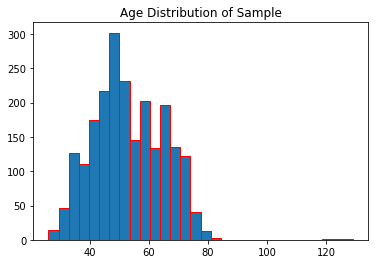

In [13]:
import numpy as np
import matplotlib.pyplot as plt
x = marketing['Age']
plt.hist(x, bins = 30, edgecolor = "red")
plt.title("Age Distribution of Sample")



Text(0.5, 1.0, 'Average 1 Year Spending in Each Product Category')

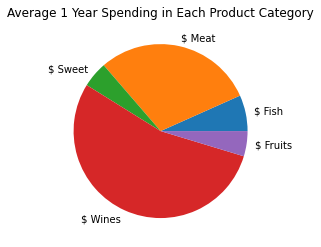

In [14]:
avgfish = marketing['MntFishProducts'].mean()
avgmeat = marketing['MntMeatProducts'].mean()
avgsweet = marketing['MntSweetProducts'].mean()
avgwines = marketing['MntWines'].mean()
avgfruits = marketing['MntFruits'].mean()

y = np.array([avgfish, avgmeat, avgsweet, avgwines,avgfruits])
labels = ["$ Fish", "$ Meat", "$ Sweet", "$ Wines","$ Fruits"]
plt.pie(y, labels = labels)
explode = (0, 0, 0,1,0)
plt.title("Average 1 Year Spending in Each Product Category")


Text(0, 0.5, 'Total Spent')

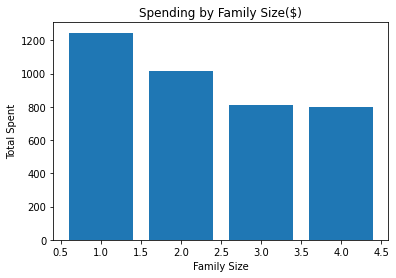

In [15]:
totalpeople = marketing['Kidhome']+marketing['Teenhome'] + 1
spent = marketing['Total_Spent']
y = spent
x = totalpeople
plt.bar(x, y)
plt.title("Spending by Family Size($)")

plt.xlabel("Family Size")
plt.ylabel("Total Spent")



Text(0.5, 1.0, 'Breakdown of Client Education Level')

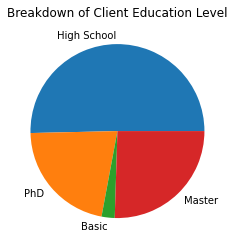

In [16]:
arraygrad = marketing['Education_Graduation'].sum()
arrayPhd = marketing['Education_PhD'].sum()
arraybasic = marketing['Education_Basic'].sum()
arraymaster = marketing['Education_Master'].sum()

y = [arraygrad,arrayPhd,arraybasic,arraymaster]
labels = ["High School", "PhD", "Basic", "Master"]
plt.pie(y, labels = labels)
explode = (0, 0, 0,0)
plt.title("Breakdown of Client Education Level")

**Data Analysis**

*Total Spent*

In [17]:
# Multiple Regression on total spent
import statsmodels.api as sm
model = sm.OLS(marketing['Total_Spent'], 
               sm.add_constant(marketing[['Income','Teenhome','Kidhome','Age','Education_Master',
                                          'Education_Graduation', 'Education_PhD', 
                                          'Marital_Status_Single']]))
result = model.fit()

# regression results
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Total_Spent   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     353.6
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:40:22   Log-Likelihood:                -14783.
No. Observations:                2216   AIC:                         2.958e+04
Df Residuals:                    2207   BIC:                         2.964e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    21.64

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


*Products*

*Wine*

In [18]:
# Splitting dataset into training and test data
x = marketing[['Income','Teenhome','Kidhome','Age','Education_Master','Education_Graduation', 
               'Education_PhD', 'Marital_Status_Single']]
y = marketing['Wines']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Building logistic model 
import statsmodels.api as sm
model1 = sm.Logit(y_train, sm.add_constant(x_train))
result1 = model1.fit()
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.371367
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Wines   No. Observations:                 1551
Model:                          Logit   Df Residuals:                     1542
Method:                           MLE   Df Model:                            8
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.4641
Time:                        18:40:22   Log-Likelihood:                -575.99
converged:                       True   LL-Null:                       -1074.9
Covariance Type:            nonrobust   LLR p-value:                4.407e-210
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -5.3585      1.097     -4.883      0.000      -7.509      -3.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [19]:
# Building logistic model by sklearn
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(fit_intercept = True, C = 1e10, solver = 'newton-cg')
result1 = model1.fit(x_train, y_train)
print(result1.coef_) 
print(result1.intercept_)

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[[ 8.92920159e-05  2.67172228e-01 -1.29730392e+00  7.83433950e-03
   3.18210461e-01  3.89726799e-01  6.75797896e-01 -5.42212513e-02]]
[-5.09858589]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [20]:
# Make predictions on test data
y_test_pred = model1.predict(x_test)
print(y_test_pred)

[1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1
 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1
 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1
 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1
 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1
 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1
 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1
 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1
 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1
 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1
 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 0 1 0 0 1 0 1 1 0 1 1 

In [21]:
# Average accuracy on the given data
# Train
score_train = model1.score(x_train, y_train)
print(score_train)
# Test
score_test = model1.score(x_test, y_test)
print(score_test)

0.869116698903933
0.8586466165413534


In [22]:
# Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print(cnf_matrix)

[[296  48]
 [ 46 275]]


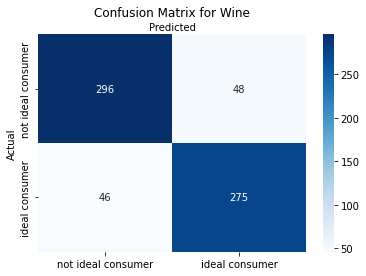

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df_cm = pd.DataFrame(cnf_matrix, index = ['not ideal consumer', 'ideal consumer'],
                     columns = ['not ideal consumer', 'ideal consumer'])
sns.heatmap(df_cm, annot = True, cmap = 'Blues', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.title('Confusion Matrix for Wine')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Interpretation:
*   Positive: They are the ideal consumer for wine (1)
*   Negative: They are not the ideal consumer for wine (0)

TN: 296 customers from our sample have been predicted to not be the ideal wine consumer and it turned out to be true.

FN: 46 customers from our sample have been predicted to not be the ideal wine consumer and it turned out to be false.

FP: 48 customers from our sample have been predicted to be the ideal wine consumer and it turned out to be false.

TP: 275 customers from our sample have been predicted to be the ideal wine consumer and it turned out to be true.

*Fruits*

In [24]:
# Splitting dataset into training and test data
x = marketing[['Income','Teenhome','Kidhome','Age','Education_Master','Education_Graduation', 'Education_PhD', 'Marital_Status_Single']]
y = marketing['Fruits']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Building logistic model 
import statsmodels.api as sm
model2 = sm.Logit(y_train, sm.add_constant(x_train))
result2 = model2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.459048
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Fruits   No. Observations:                 1551
Model:                          Logit   Df Residuals:                     1542
Method:                           MLE   Df Model:                            8
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.3377
Time:                        18:40:25   Log-Likelihood:                -711.98
converged:                       True   LL-Null:                       -1075.0
Covariance Type:            nonrobust   LLR p-value:                1.719e-151
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.3913      0.500     -2.781      0.005      -2.372      -0.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [25]:
# Building logistic model by sklearn
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(fit_intercept = True, C = 1e10, solver = 'newton-cg')
result2 = model2.fit(x_train, y_train)
print(result2.coef_) 
print(result2.intercept_)

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[[ 6.82942148e-05 -1.04235021e+00 -1.07612644e+00 -8.83209050e-05
  -9.46055872e-01 -8.44432802e-01 -1.79051371e+00 -6.76209107e-02]]
[-1.43908873]


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [26]:
# Make predictions on test data
y_test_pred = model2.predict(x_test)
print(y_test_pred)

[1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1
 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1
 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1
 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1
 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1
 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1
 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 0 1 0 0 1 1 1 0 0 1 1 

In [27]:
# Average accuracy on the given data
# Train
score_train = model2.score(x_train, y_train)
print(score_train)
# Test
score_test = model2.score(x_test, y_test)
print(score_test)

0.7975499677627337
0.7819548872180451


In [28]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print(cnf_matrix)


[[295  52]
 [ 93 225]]


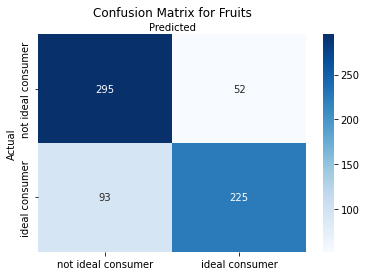

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df_cm = pd.DataFrame(cnf_matrix, index = ['not ideal consumer', 'ideal consumer'],
                     columns = ['not ideal consumer', 'ideal consumer'])
sns.heatmap(df_cm, annot = True, cmap = 'Blues', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.title('Confusion Matrix for Fruits')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Interpretation:
*   Positive: They are the ideal consumer for fruits (1)
*   Negative: They are not the ideal consumer for fruits (0)

TN: 295 customers from our sample have been predicted to not be the ideal fruits consumer and it turned out to be true.

FN: 93 customers from our sample have been predicted to not be the ideal fruits consumer and it turned out to be false.

FP: 52 customers from our sample have been predicted to be the ideal fruits consumer and it turned out to be false.

TP: 225 customers from our sample have been predicted to be the ideal fruits consumer and it turned out to be true.

*Meat*

In [30]:
# Splitting dataset into training and test data
x = marketing[['Income','Teenhome','Kidhome','Age','Education_Master','Education_Graduation', 'Education_PhD', 'Marital_Status_Single']]
y = marketing['Meat']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Building logistic model 
import statsmodels.api as sm
model3 = sm.Logit(y_train, sm.add_constant(x_train))
result3 = model3.fit()
print(result3.summary())

Optimization terminated successfully.
         Current function value: 0.379619
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   Meat   No. Observations:                 1551
Model:                          Logit   Df Residuals:                     1542
Method:                           MLE   Df Model:                            8
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.4523
Time:                        18:40:27   Log-Likelihood:                -588.79
converged:                       True   LL-Null:                       -1075.1
Covariance Type:            nonrobust   LLR p-value:                1.249e-204
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.5677      1.089     -4.194      0.000      -6.702      -2.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [31]:
# Building logistic model by sklearn
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression(fit_intercept = True, C = 1e10, solver = 'newton-cg')
result3 = model3.fit(x_train, y_train)
print(result3.coef_) 
print(result3.intercept_)

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[[ 9.61071197e-05 -4.71776482e-01 -1.12294469e+00 -1.06157490e-02
   7.74208488e-01  8.26697588e-01  4.26553288e-01 -2.11686094e-03]]
[-4.3807502]


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [32]:
# Make predictions on test data
y_test_pred = model3.predict(x_test)
print(y_test_pred)

[1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1
 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1
 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1
 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1
 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1
 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1
 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0
 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1
 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 0 1 0 0 1 1 1 0 0 1 1 

In [33]:
# Average accuracy on the given data
# Train
score_train = model3.score(x_train, y_train)
print(score_train)
# Test
score_test = model3.score(x_test, y_test)
print(score_test)

0.8555770470664088
0.8571428571428571


In [34]:
# Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print(cnf_matrix)

[[306  37]
 [ 58 264]]


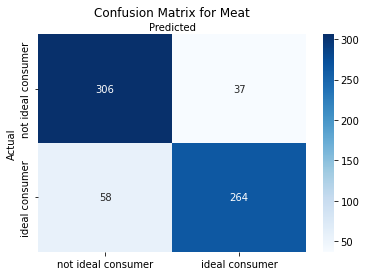

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df_cm = pd.DataFrame(cnf_matrix, index = ['not ideal consumer', 'ideal consumer'],
                     columns = ['not ideal consumer', 'ideal consumer'])
sns.heatmap(df_cm, annot = True, cmap = 'Blues', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.title('Confusion Matrix for Meat')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Interpretation:
*   Positive: They are the ideal consumer for meat (1)
*   Negative: They are not the ideal consumer for meat (0)

TN: 306 customers from our sample have been predicted to not be the ideal meat consumer and it turned out to be true.

FN: 58 customers from our sample have been predicted to not be the ideal meat consumer and it turned out to be false.

FP: 37 customers from our sample have been predicted to be the ideal meat consumer and it turned out to be false.

TP: 264 customers from our sample have been predicted to be the ideal meat consumer and it turned out to be true.

*Fish*

In [36]:
# Splitting dataset into training and test data
x = marketing[['Income','Teenhome','Kidhome','Age','Education_Master','Education_Graduation', 'Education_PhD', 'Marital_Status_Single']]
y = marketing['Fish']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Building logistic model 
import statsmodels.api as sm
model4 = sm.Logit(y_train, sm.add_constant(x_train))
result4 = model4.fit()
print(result4.summary())

Optimization terminated successfully.
         Current function value: 0.480850
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   Fish   No. Observations:                 1551
Model:                          Logit   Df Residuals:                     1542
Method:                           MLE   Df Model:                            8
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.3063
Time:                        18:40:30   Log-Likelihood:                -745.80
converged:                       True   LL-Null:                       -1075.0
Covariance Type:            nonrobust   LLR p-value:                6.143e-137
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.9703      0.494     -1.963      0.050      -1.939      -0.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [37]:
# Building logistic model by sklearn
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression(fit_intercept = True, C = 1e10, solver = 'newton-cg')
result4 = model4.fit(x_train, y_train)
print(result4.coef_) 
print(result4.intercept_)

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[[ 5.67843480e-05 -1.15852461e+00 -1.21235153e+00 -2.80828628e-03
  -5.42284580e-01 -4.71221606e-01 -1.39810723e+00  2.30387110e-03]]
[-0.99295373]


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

In [38]:
# Make predictions on test data
y_test_pred = model4.predict(x_test)
print(y_test_pred)

[1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1
 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1
 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1
 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1
 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0
 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1
 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 1 

In [39]:
# Average accuracy on the given data
# Train
score_train = model4.score(x_train, y_train)
print(score_train)
# Test
score_test = model4.score(x_test, y_test)
print(score_test)

0.793036750483559
0.7639097744360902


In [40]:
# Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print(cnf_matrix)

[[289  59]
 [ 98 219]]


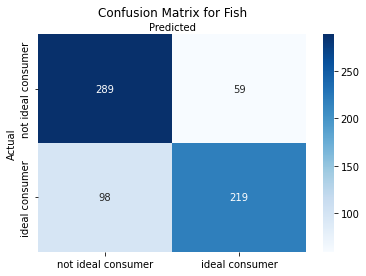

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df_cm = pd.DataFrame(cnf_matrix, index = ['not ideal consumer', 'ideal consumer'],
                     columns = ['not ideal consumer', 'ideal consumer'])
sns.heatmap(df_cm, annot = True, cmap = 'Blues', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.title('Confusion Matrix for Fish')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Interpretation:
*   Positive: They are the ideal consumer for fish (1)
*   Negative: They are not the ideal consumer for fish (0)

TN: 289 customers from our sample have been predicted to not be the ideal fish consumer and it turned out to be true.

FN: 98 customers from our sample have been predicted to not be the ideal fish consumer and it turned out to be false.

FP: 59 customers from our sample have been predicted to be the ideal fish consumer and it turned out to be false.

TP: 219 customers from our sample have been predicted to be the ideal fish consumer and it turned out to be true.

*Sweets*

In [42]:
# Splitting dataset into training and test data
x = marketing[['Income','Teenhome','Kidhome','Age','Education_Master','Education_Graduation', 'Education_PhD', 'Marital_Status_Single']]
y = marketing['Sweet']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Building logistic model 
import statsmodels.api as sm
model5 = sm.Logit(y_train, sm.add_constant(x_train))
result5 = model5.fit()
print(result5.summary())

Optimization terminated successfully.
         Current function value: 0.481825
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Sweet   No. Observations:                 1551
Model:                          Logit   Df Residuals:                     1542
Method:                           MLE   Df Model:                            8
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.3049
Time:                        18:40:33   Log-Likelihood:                -747.31
converged:                       True   LL-Null:                       -1075.1
Covariance Type:            nonrobust   LLR p-value:                2.722e-136
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5696      0.477      1.195      0.232      -0.365       1.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [43]:
# Building logistic model by sklearn
from sklearn.linear_model import LogisticRegression
model5 = LogisticRegression(fit_intercept = True, C = 1e10, solver = 'newton-cg')
result5 = model5.fit(x_train, y_train)
print(result5.coef_) 
print(result5.intercept_)

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[[ 5.72856900e-05 -8.58799628e-01 -1.27682471e+00 -1.92360965e-02
  -1.68746144e+00 -1.17571896e+00 -2.26053549e+00 -4.86899510e-02]]
[0.56956503]


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

In [44]:
# Make predictions on test data
y_test_pred = model5.predict(x_test)
print(y_test_pred)

[1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1
 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1
 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1
 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1
 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1
 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1
 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0
 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1
 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 1 

In [45]:
# Average accuracy on the given data
# Train
score_train = model5.score(x_train, y_train)
print(score_train)
# Test
score_test = model5.score(x_test, y_test)
print(score_test)

0.7878787878787878
0.7518796992481203


In [46]:
# Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print(cnf_matrix)

[[284  56]
 [109 216]]


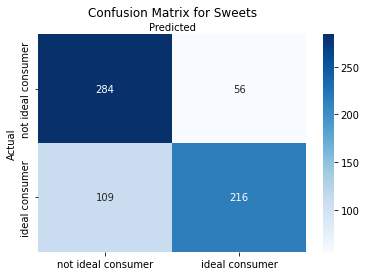

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df_cm = pd.DataFrame(cnf_matrix, index = ['not ideal consumer', 'ideal consumer'],
                     columns = ['not ideal consumer', 'ideal consumer'])
sns.heatmap(df_cm, annot = True, cmap = 'Blues', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.title('Confusion Matrix for Sweets')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Interpretation:
*   Positive: They are the ideal consumer for sweets (1)
*   Negative: They are not the ideal consumer for sweets (0)

TN: 284 customers from our sample have been predicted to not be the ideal sweets consumer and it turned out to be true.

FN: 109 customers from our sample have been predicted to not be the ideal sweets consumer and it turned out to be false.

FP: 56 customers from our sample have been predicted to be the ideal sweets consumer and it turned out to be false.

TP: 216 customers from our sample have been predicted to be the ideal sweets consumer and it turned out to be true.

# Prediciting using a real person for Wine

In [48]:
from sklearn.linear_model import LogisticRegression
x = marketing[['Income', 'Education_Master', 'Marital_Status_Single','Age']]
y = marketing['Wines']
model = LogisticRegression(fit_intercept = True, C = 1e10, solver = 'newton-cg')
result = model.fit(x.values, y)

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

Customer Profile:

Income: $20,000

A Master's Degreee: Yes (1)

Marital status: Single (1)

Age: 20 years old


In [49]:
# To see the customer's probability of being an ideal consumer for wine
model.predict_proba([[20000,1,1,20]])

array([[0.98713139, 0.01286861]])

Interpretation:

The probability of not being an ideal consumer for wine is 98.71%

The probability of being an ideal consumer for wine is 1.28%

In [50]:
# To see if they are the ideal wine consumer (1) or not (0)
model.predict([[20000,1,1,20]])

array([0])

Interpretation:

They are not the ideal wine consumer